# DS-SF-30 | Unit Project 1: Research Design

In this first unit project you will create a framework to scope out data science projects.  This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

## Part A.  Evaluate the following problem statement:

> "Determine which free-tier customers will convert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and `activity score 1 = active user`, `0 = inactive user`) based on Hooli data from January-April 2015."

> ### Question 1.  What is the outcome?

Answer: Return customer indicator (yes - converted OR no - did not convert)

> ### Question 2.  What are the predictors/covariates?

Answer: demographic data (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0 = inactive user)

> ### Question 3.  What timeframe is this data relevent for?

Answer: January-April 2015

> ### Question 4.  What is the hypothesis?

Answer: Demographic and customer useage data will allow us to predict if a customer will convert to a paying customer.

## Part B.  Let's start exploring our UCLA dataset and answer some simple questions:

Completed Jupyter Notebook

Requirements:
Identify the variables of the dataset, including the response and predictors.
Create a data dictionary with classification of available variables.
Write a high quality problem statement.
State the risks and assumptions of your data.
Outline exploratory data analysis methods.

We'll be using the UCLA's Logit Regression in R tutorial to explore logistic regression in Python. Our goal will be to identify the various factors that may influence admission into graduate school.

The dataset contains four variables: admit, gre, gpa, and prestige:

admit is a binary variable. It indicates whether or not a candidate was admitted into UCLA (admit = 1) or not (admit = 0).
gre is the GRE score. GRE stands for Graduate Record Examination.
gpa is the GPA score. GPA stands for Grade Point Average.
prestige is the prestige of an applicant alma mater, with 1 as highest tier (most prestigeous) and 4 as the lowest tier (least prestigeous).

In [70]:
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df.head(10)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [60]:
df.shape

(400, 4)

In [61]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [13]:
df.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

In [15]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [21]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [58]:
print "Mean GPA of applicants not admitted to UCLA =", df[df.admit == 0].gpa.mean()
print "Mean GPA of applicants admitted to UCLA =", df[df.admit == 1].gpa.mean()
print "Median GPA of applicants not admitted to UCLA =", df[df.admit == 0].gpa.median()
print "Median GPA of applicants admitted to UCLA =", df[df.admit == 1].gpa.median()
print "Mode GPA of applicants not admitted to UCLA =", df[df.admit == 0].gpa.mode()
print "Mode GPA of applicants admitted to UCLA =", df[df.admit == 1].gpa.mode()

print "Mean GRE of applicants not admitted to UCLA =", df[df.admit == 0].gre.mean()
print "Mean GRE of applicants admitted to UCLA =", df[df.admit == 1].gre.mean()
print "Median GRE of applicants not admitted to UCLA =", df[df.admit == 0].gre.median()
print "Median GRE of applicants admitted to UCLA =", df[df.admit == 1].gre.median()
print "Mode GRE of applicants not admitted to UCLA =", df[df.admit == 0].gre.mode()
print "Mode GRE of applicants admitted to UCLA =", df[df.admit == 1].gre.mode()

print "Mean of Prestige of applicants not admitted to UCLA =", df[df.admit == 0].prestige.mean()
print "Mean of Prestige of applicants admitted to UCLA =", df[df.admit == 1].prestige.mean()
print "Median of Prestige of applicants not admitted to UCLA =", df[df.admit == 0].prestige.median()
print "Median of Prestige of applicants admitted to UCLA =", df[df.admit == 1].prestige.median()
print "Mode of Prestige of applicants not admitted to UCLA =", df[df.admit == 0].prestige.mode()
print "Mode of Prestige of applicants admitted to UCLA =", df[df.admit == 1].prestige.mode()

Mean GPA of applicants not admitted to UCLA = 3.34540441176
Mean GPA of applicants admitted to UCLA = 3.48920634921
Median GPA of applicants not admitted to UCLA = 3.34
Median GPA of applicants admitted to UCLA = 3.545
Mode GPA of applicants not admitted to UCLA = 0    4.0
dtype: float64
Mode GPA of applicants admitted to UCLA = 0    4.0
dtype: float64
Mean GRE of applicants not admitted to UCLA = 573.579335793
Mean GRE of applicants admitted to UCLA = 618.897637795
Median GRE of applicants not admitted to UCLA = 580.0
Median GRE of applicants admitted to UCLA = 620.0
Mode GRE of applicants not admitted to UCLA = 0    580.0
dtype: float64
Mode GRE of applicants admitted to UCLA = 0    620.0
1    660.0
dtype: float64
Mean of Prestige of applicants not admitted to UCLA = 2.64102564103
Mean of Prestige of applicants admitted to UCLA = 2.15079365079
Median of Prestige of applicants not admitted to UCLA = 3.0
Median of Prestige of applicants admitted to UCLA = 2.0
Mode of Prestige of applic

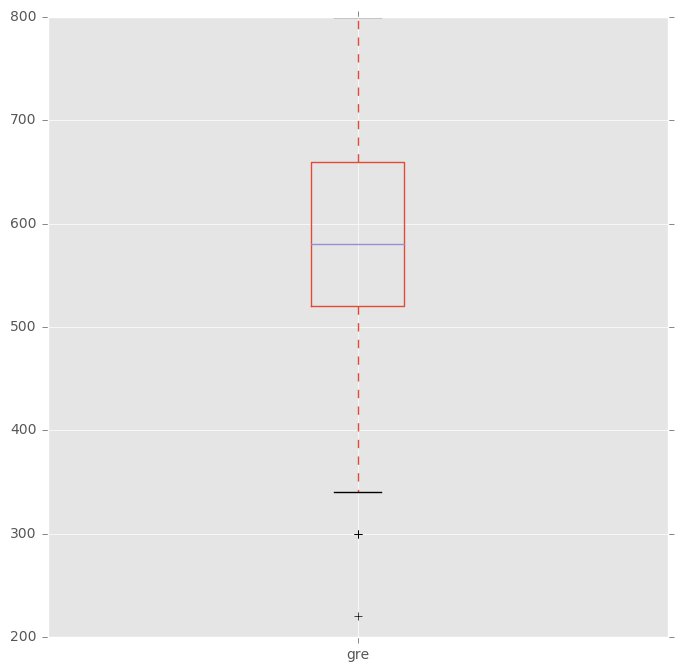

In [71]:
df[ ['gre'] ].plot(kind = 'box', figsize = (8, 8))

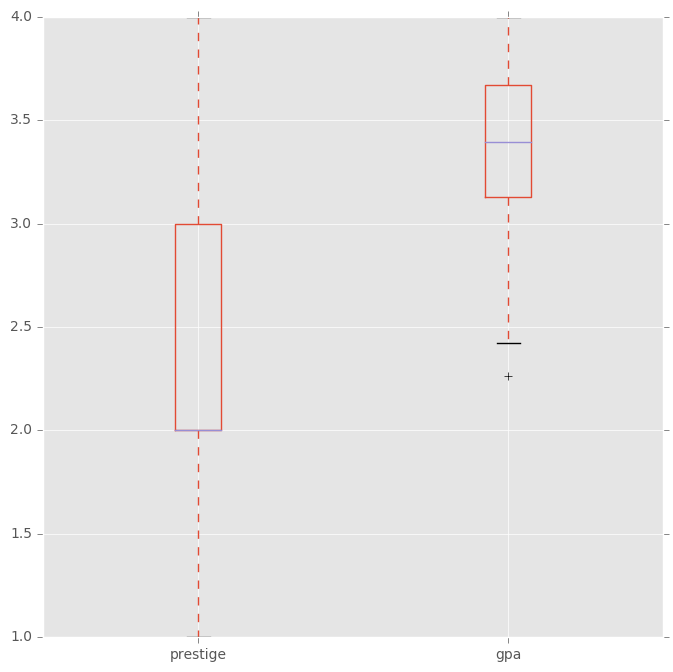

In [74]:
df[ ['prestige', 'gpa'] ].plot(kind = 'box', figsize = (8, 8))

In [77]:
corr = df.corr()

corr

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 5.  Create a data dictionary.

Answer: 

Variable | Description | Type of Variable
---|---|---
admit | candidate admitted into UCLA (admit = 1) or not (admit = 0) | Categorical
gre | Graduate Record Examination score; integer | Continuous
gra | Grade Point Average score; integer | Continuous
presitge | prestige of an applicant's alma mater: 1 - highest prestige tier; 4 - lowest prestige tier. | Categorical

We would like to explore the association between gre, gra, prestige and admit.

> ### Question 6.  What is the outcome?

Answer: Applicant admission information will allow us to predict if a student will be accepted or not accepted to UCLA.

> ### Question 7.  What are the predictors/covariates?

Answer: admit, GRE, GRA, prestige of alma mater

> ### Question 8.  What timeframe is this data relevent for?

Answer: unknown

> ### Question 9.  What is the hypothesis?

Answer: Admission data will allow us to predict whether a student was admitted to UCLA or not.

> ### Question 10.  What's the problem statement?

> Using your answers to the above questions, write a well-formed problem statement.

Answer: Using UCLA admissions data determine how likely students are to be admitted to UCLA using the following applicant admission information (GRA, GRE, prestige of applicants alta mater).

## Part C.  Create an exploratory analysis plan by answering the following questions:

Because the answers to these questions haven't yet been covered in class yet, this section is optional.  This is by design.  By having you guess or look around for these answers will help make sense once we cover this material in class.  You will not be penalized for wrong answers but we encourage you to give it a try!

> ### Question 11. What are the goals of the exploratory analysis?

Answer: Find which of the variables or which combination of variables is a better predictor of admission to UCLA. 

> ### Question 12.  What are the assumptions of the distribution of data?

Answer: 
Entire dataset:
GRE data will form a bell-shaped convex curve
GRA data will form a bell-shaped convex curve
Prestige data will form a bell-shaped convex curve
Where admit = 1:
GRE/GRA will form a bell-shaped convex curve skewed to the right more than the average of the entire dataset
Prestige will form a bell-shaped convex curve skewed to the left more than the average of the entire dataset

> ### Question 13.  How will determine the distribution of your data?

Answer: mean, min, max, 25% IQR, 50% IQR, 75% IQR, standard deviation, scatter plot, box plot

> ### Question 14.  How might outliers impact your analysis?

Answer: outliers would skew the analysis resulting in variable correlations being overstated or understated; they are likely to introduce variance

> ### Question 15.  How will you test for outliers?

Answer: calculate 4 quartiles of data distrbution; calculate Inter Quartile Range: Q3-Q1; if the observation lies 1.5IQR above upper quartile or below lower quartile it is considered an outlier

> ### Question 16.  What is colinearity?

Answer: a linear relationship between two variables: in UCLA admission data this relationship might exist between GRE and admit, GRA and admit, prestige and admit, GRE and GRA, etc. 

> ### Question 17.  How will you test for covariance?

Answer: measure how changes in any of the variables are associated with changes in any other variable/s; calculate correlation coefficient of each of the variables to the admit variable 

> ### Question 18.  What is your exploratory analysis plan?

> Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now.

Answer: describe data - find mean, standard deviation, IQ ranges, 1.5IQR outliers; create a scatter plot; find correlation coefficient between gre, gra, prestige variables and admit 1 and admit 0; find which variables possess mutlicollinearity

# Risks and Assumptions
Hypothesis and assumption of data distribution relies on the fact that UCLA is considered a top undergraduate school (14 in the the world according to Times of London) and hence would favor applicants with high gpa, gre, and prestige. 